<a href="https://colab.research.google.com/github/josh-ashkinaze/Google-profanity-words/blob/master/images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages

In [0]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

First let's read in the DF. 

# Read in Data

In [0]:
# Read in DF

import pandas as pd
import io
import requests
import statsmodels.api as sm

url="https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

Now we examine the structure of the dataframe. 

# Examine Structure of DF

In [0]:
# Examine structure
df.head()
display("Length: {}".format(len(df)))
display(df.columns)
display(df.dtypes, "\n")
display(df.head())

df.rename(columns={'Cupper.Points': 'Rating'}, inplace=True)
print(df.columns)


'Length: 1311'

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

'\n'

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Rating',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


# Examine correlations and PCs

## Select features

In [0]:

# Extract some features 
X = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']
# And store our dv
Y = ['Rating']

df = df[(df[['Rating']] != 0).all(axis=1)]


dfAll = df[X + Y]
dfX = df[X]
dfY = df[Y]

## Describe data

In [0]:
dfAll.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Rating
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,7.569580,7.523809,7.403344,7.538863,7.523466,7.523244,9.840901,9.840626,9.910832,7.503588
std,0.315845,0.341897,0.349867,0.319912,0.293129,0.349304,0.489058,0.722158,0.454991,0.427138
min,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,6.000000,0.000000,1.330000,5.170000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000


A couple of things here. 

1. First of all, there's *very* lttle variance in ratings. All ratings are constrained between 5-8. But come on, everyone has had really crappy coffee before. 

2. Second, many of the features hover around a 7. 

3. Third, clean cup and uniformity have the most variance, and these features are the most abstract, so that makes sense. 

## Correlations

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Rating
Aroma,1.000000,0.740395,0.692871,0.606234,0.554014,0.606595,0.133865,0.179784,0.059936,0.602972
Flavor,0.740395,1.000000,0.858199,0.744688,0.661650,0.731159,0.209349,0.266128,0.127921,0.741784
Aftertaste,0.692871,0.858199,1.000000,0.714618,0.665648,0.761918,0.204337,0.257380,0.111626,0.730631
Acidity,0.606234,0.744688,0.714618,1.000000,0.609961,0.643305,0.147602,0.136698,0.069022,0.612921
Body,0.554014,0.661650,0.665648,0.609961,1.000000,0.672963,0.080863,0.108637,0.040754,0.570301
Balance,0.606595,0.731159,0.761918,0.643305,0.672963,1.000000,0.207776,0.241295,0.107527,0.670284
Uniformity,0.133865,0.209349,0.204337,0.147602,0.080863,0.207776,1.000000,0.433037,0.383786,0.186161
Clean.Cup,0.179784,0.266128,0.257380,0.136698,0.108637,0.241295,0.433037,1.000000,0.429211,0.241335
Sweetness,0.059936,0.127921,0.111626,0.069022,0.040754,0.107527,0.383786,0.429211,1.000000,0.097213
Rating,0.602972,0.741784,0.730631,0.612921,0.570301,0.670284,0.186161,0.241335,0.097213,1.000000


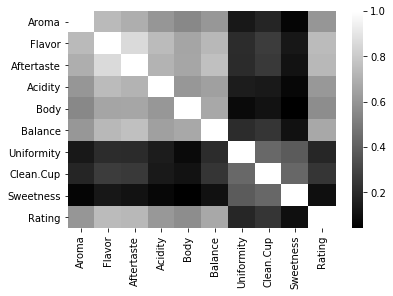

In [0]:

# Correlation table
corr = dfAll.corr()
display(corr)
ax = sns.heatmap(corr, cmap="gist_yarg_r")


# Build Model

## Define model methods

In [0]:

import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.stats.stattools import omni_normtest


def linear_model(IVs, DVs, df):
  """
  Fits a linear model with a robust covariance structure -
  Returns model object and results 
  """

  # Make model 
  model = sm.OLS(df[DV], sm.add_constant(df[IVs])).fit(cov_type = "HC2")

  # Print results 
  print(model.summary())
  return model



def analyze_residuals(model):
  """
  Analyze residuals - 
  
  Prints summary statistics, graphs residuals, 
  and looks at countries with high and low residuals 
  """
  r = pd.DataFrame(model.resid, columns=['resid'])
  plt.figure(figsize=(12,10))
  sns.distplot(r)
  
  # Look at influential points 
  fig, ax = plt.subplots(figsize=(12,8))
  fig = sm.graphics.influence_plot(model, ax=ax)
  
  # Look at residual summary statistics 
  print ('-'*30 + 'resid' + '-'*30)
  print (r.describe())
  print ('\n')
  
  # Sort residuals 
  r_sort = r.sort_values('resid')
  
  # Print overperformers (large positive residuals)
  print("*"*20, "Overperformers", "*"*20)
  overperformers = df.iloc[r_sort.head(5).index.values.tolist() ]
  display(overperformers)
  
  # Print underperformers (large negative residuals)
  print("*"*20, "Underperformers", "*"*20)
  underperformers = df.iloc[r_sort.tail(5).index.values.tolist() ]
  display(underperformers)

## Create and analyze model

In [0]:
  # Select variables 
  IVs = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
         'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', "Moisture"]
  DV = ["Rating"]
  
  model = linear_model(IVs, DV, df)
  analyze_residuals(model)
  
  

KeyError: ignored

In [0]:
  # Select variables 
  IVs = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
         'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', "Moisture"]
  DV = ["Rating"]
  
  df2 = df[ (df["Country.of.Origin"] == "Taiwan") | (df["Country.of.Origin"] == "China")]
  
  model = linear_model(IVs, DV, df2)
  analyze_residuals(model)
  
  

KeyError: ignored

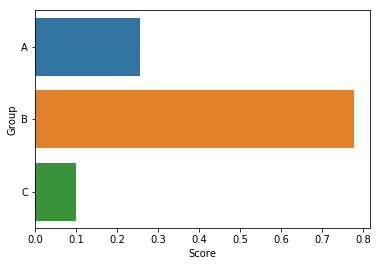

In [0]:
data = {
    "Group": ["A", "B", "C"],
    "Score": [0.255555, 0.77767, 0.1]
}

df = pd.DataFrame(data)
sns.barplot(y="Group", x="Score", data=df)

A couple of interesting things: 
1. 